# Predicting Blood Glucose with Support Vector Regression including hyperparameter tuning.

## Simon Kennedy

### 9 May 2022

# 1. Problem definition

Predicting the disease progression of diabetes using the diabetes dataset from Scikit-learn.

I will be proposing a Support Vector Regression model with the best performance on this dataset when compared to a naive and regression baseline.

The target variable is target_glucose.

# Task 1.

Write code to load the dataset and run the machine learning pipeline using SVR with different kernels. 

Please select at least two kernels to explore them.

You can use the kernels you’ve learned about in this course, or other kernels.

# 2. Data ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target 

df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes["target_glucose"] = diabetes.target
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# 3. Data Preparation

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s2'}>],
       [<AxesSubplot:title={'center':'s3'}>,
        <AxesSubplot:title={'center':'s4'}>,
        <AxesSubplot:title={'center':'s5'}>],
       [<AxesSubplot:title={'center':'s6'}>,
        <AxesSubplot:title={'center':'target_glucose'}>, <AxesSubplot:>]],
      dtype=object)

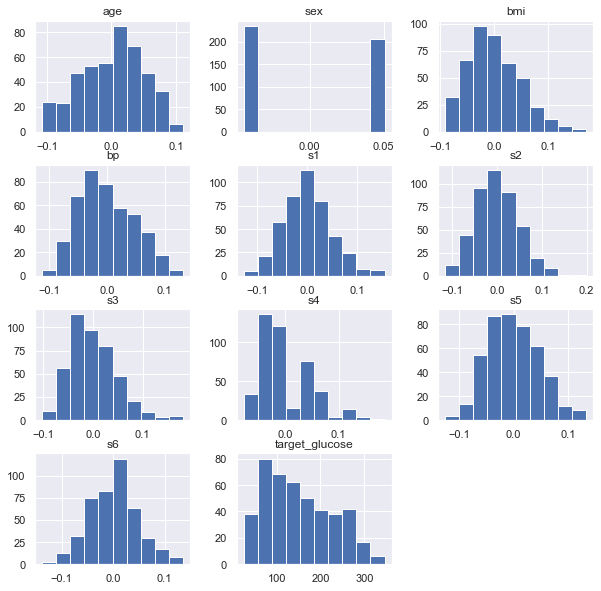

In [2]:
df_diabetes.hist(figsize=(10,10))

**A closer look at the target variable**

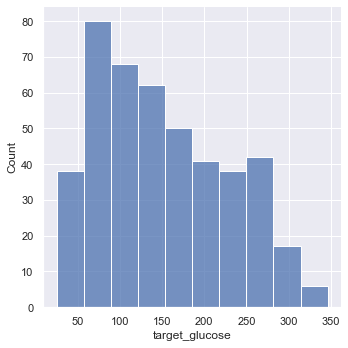

In [3]:
sns.displot(df_diabetes.target_glucose, bins= 10)
plt.show()

## Cleaning and Normalisation

By default the feature data of the loaded dataset has already been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1) as per the scikit-learn documentation. 

This is apparent in all the histogram plots as they have a normal distribution and a mean of 0 (except the target data of target_glucose).

There are no obvious outliers or cleaning requirements demonstarted by these histograms.

I further clarify this by checking for null values.

In [4]:
df_diabetes.isnull().sum()

age               0
sex               0
bmi               0
bp                0
s1                0
s2                0
s3                0
s4                0
s5                0
s6                0
target_glucose    0
dtype: int64

## Correlation analysis

#### Pairplot of diabetes data

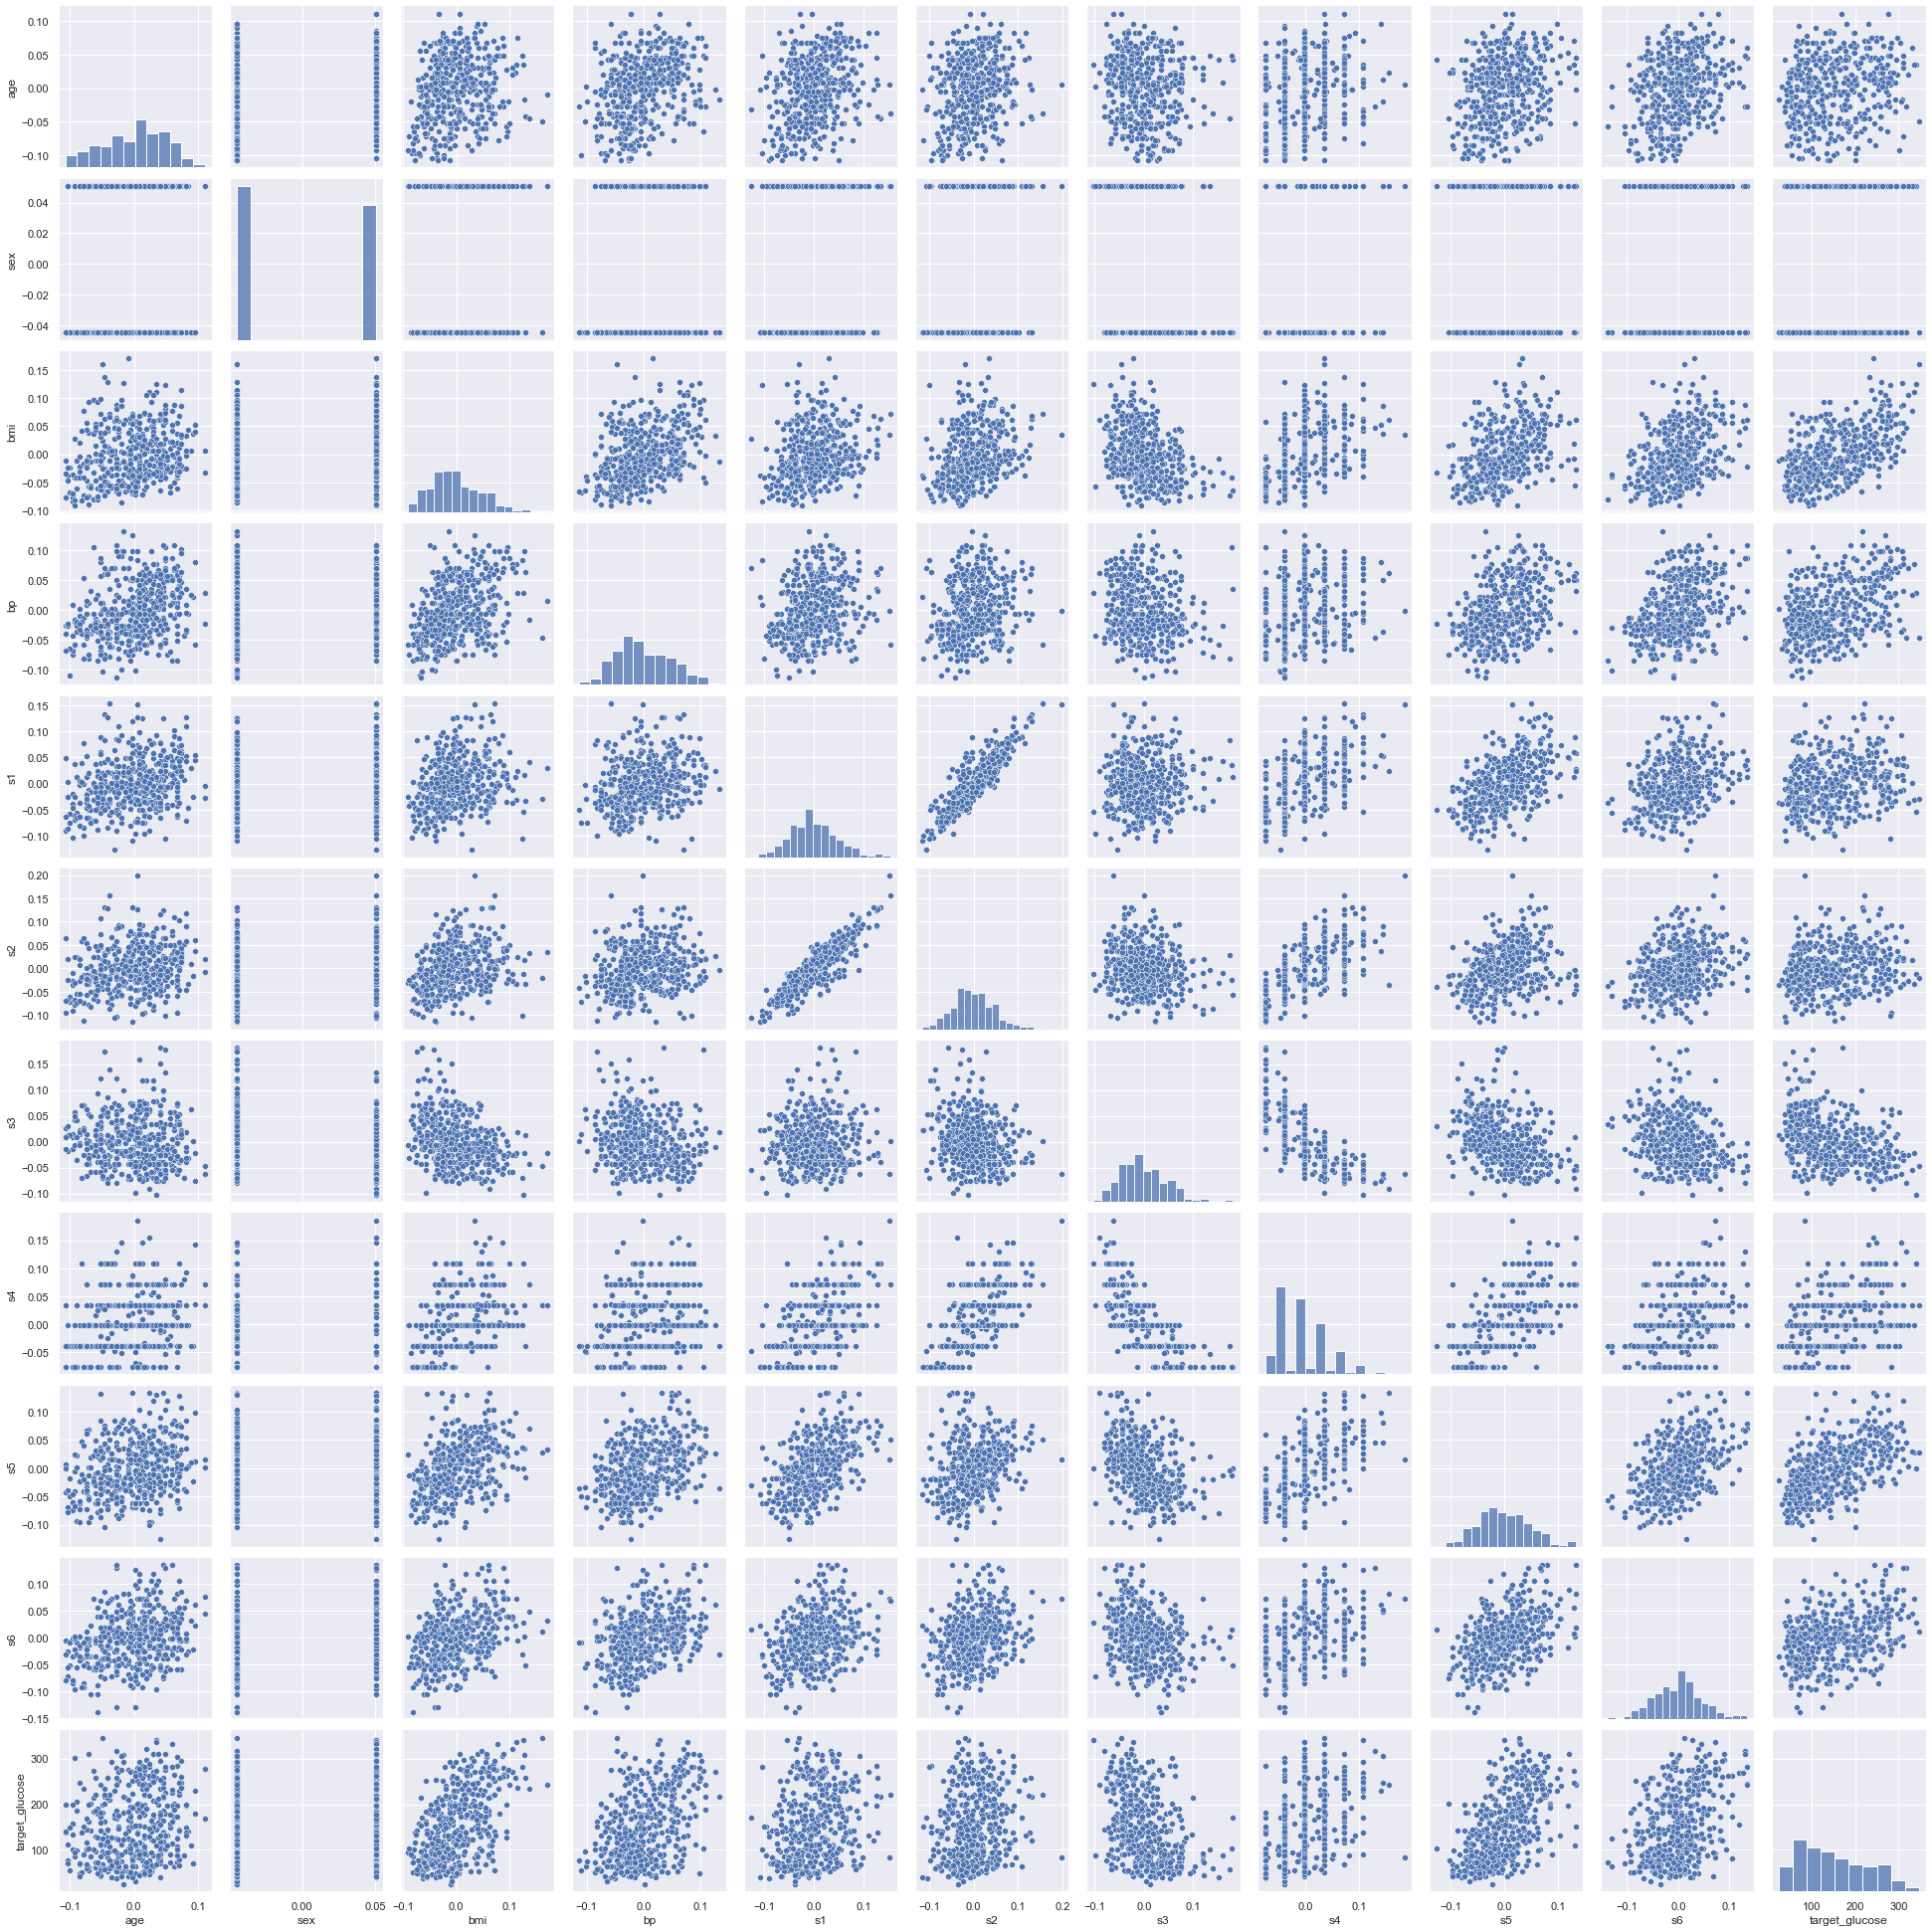

In [5]:
sns.pairplot(df_diabetes)

We can see a strong positive linear relationship between s1 and s2

**Correlation heatmap**

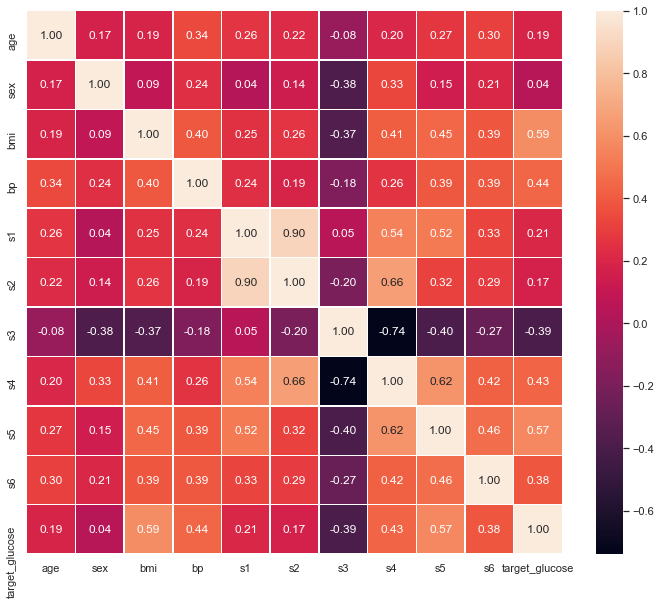

In [6]:
correlation_matrix = df_diabetes.corr()

plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot = True, fmt='.2f', linewidths=.5)

plt.show()

The highest correlations with the target_glucose are bmi at 0.59 and s5 at 0.57.

s1 and s2 are highly correlated with each other at 0.9. s1 has the highest correlation with target_glucose of the two at 0.21.

### Feature selection

Only one of s1 and s2 are required given their high correlation, s2 will be dropped. All other variables will be kept as there are no highly correlated variables with the target_glucose.

**Storing the target and the features that will feed the model**

In [7]:
X = pd.DataFrame(np.c_[df_diabetes.age, df_diabetes.sex, df_diabetes.bmi, df_diabetes.bp,
                      df_diabetes.s1, df_diabetes.s3, df_diabetes.s4,
                      df_diabetes.s5, df_diabetes.s6], columns=['age','sex', 'bmi', 'bp',
                      's1', 's3', 's4','s5','s6'])
y = df_diabetes.target_glucose
y.head(), X.head()

(0    151.0
 1     75.0
 2    141.0
 3    206.0
 4    135.0
 Name: target_glucose, dtype: float64,
         age       sex       bmi        bp        s1        s3        s4  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401 -0.002592   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.039493   
 2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.032356 -0.002592   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.034309   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.002592   
 
          s5        s6  
 0  0.019908 -0.017646  
 1 -0.068330 -0.092204  
 2  0.002864 -0.025930  
 3  0.022692 -0.009362  
 4 -0.031991 -0.046641  )

**Checking the shape of X and y are compatible and that 1 column has been dropped from X**

In [8]:
X.shape, y.shape

((442, 9), (442,))

# 4. Data Segregation

**Split the data into training and testing**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, train = 0.25
#defining a seed to get the same split in the data

# 5. Model Training

## Model 1. Support Vector Regression with 'linear' kernel

**Defining and fitting the model**

In [10]:
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')

svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

**Getting the RMSE of the predictions**

In [11]:
from sklearn.metrics import mean_squared_error

y_linear_test_predict = svr_linear.predict(X_test)

RMSE_linear_test = np.sqrt(mean_squared_error(y_test, y_linear_test_predict))

print('The svr linear model performance in testing is ', RMSE_linear_test)

The svr linear model performance in testing is  73.61443697729138


## Model 2. Support Vector Regression with 'poly' kernel

**Defining and fitting the model**

In [12]:
svr_poly = SVR(kernel='poly')

svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

**Getting the RMSE of the predictions**

In [13]:
y_poly_test_predict = svr_poly.predict(X_test)

RMSE_poly_test = np.sqrt(mean_squared_error(y_test, y_poly_test_predict))

print('The svr poly model performance in testing is ', RMSE_poly_test)

The svr poly model performance in testing is  62.74086482882576


# Task 2.

Create two baseline solutions (e.g., a naïve baseline and a dummy regression baseline). Compare your two SVR models (defined in Step 1) with the two baseline methods based on RMSE.

## Establishing baselines

**Mean baseline**

In [14]:
from sklearn.metrics import mean_squared_error

mean_baseline = np.mean(y_train)

y_baseline = np.repeat(mean_baseline, len(y_test))

naive_MSE = mean_squared_error(y_test, y_baseline)
naive_RSME = np.sqrt(naive_MSE)
naive_RSME

74.88122548938378

**Dummy regressor baseline** 

In [15]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="median") # median strategy produce as slightly lower RMSE than 'mean' stategy
dummy_regr.fit(X_train, y_train)

dummy_baseline = dummy_regr.predict(X_test)

print(y_baseline[0:5])
print(dummy_baseline[0:5])
print('y_baseline shape ', y_baseline.shape)
print('dummy_baseline shape ', dummy_baseline.shape)

[154.34441088 154.34441088 154.34441088 154.34441088 154.34441088]
[142. 142. 142. 142. 142.]
y_baseline shape  (111,)
dummy_baseline shape  (111,)


In [16]:
dummy_MSE = mean_squared_error(y_test, dummy_baseline)
 
dummy_RMSE = np.sqrt(dummy_MSE)
 
print(dummy_RMSE)

74.44612296973715


In [17]:
from tabulate import tabulate

#create data
data = [["linear", "RMSE", naive_RSME, dummy_RMSE, RMSE_linear_test, (RMSE_linear_test-naive_RSME), (RMSE_linear_test-dummy_RMSE)], 
        ["poly", "RMSE", naive_RSME, dummy_RMSE, RMSE_poly_test, (RMSE_poly_test-naive_RSME), (RMSE_poly_test-dummy_RMSE)]]
  
#define header names
col_names = ["SVR Model", "Metric", "Mean Baseline", "Dummy Baseline", "Model Performance", "Diff. from Mean b", "Diff. from dummy b"]
  
#display table
print(tabulate(data, headers = col_names))

SVR Model    Metric      Mean Baseline    Dummy Baseline    Model Performance    Diff. from Mean b    Diff. from dummy b
-----------  --------  ---------------  ----------------  -------------------  -------------------  --------------------
linear       RMSE              74.8812           74.4461              73.6144             -1.26679             -0.831686
poly         RMSE              74.8812           74.4461              62.7409            -12.1404             -11.7053


The table shows the linear SVR performance is 1.2668 RMSE better than the mean baseline and 0.8317 RMSE better than the dummy regressor baseline.

The poly SVR perfomrs better than the linear with a 12.1404 reduction in RMSE compared to the mean baseline an 11.7053 reduction in RMSE compared to the dummy regressor baseline.

# Task 3.

Perform hyperparameter tuning for your two SVR models defined in Step 1. 

Compare the final models with the two baseline methods (defined in Step 2) based on RMSE.

# Hyperparameter tuning

### Model 1. SVR linear kernel

**Checking the keys required for the SVR parameter grid**

In [18]:
svr_linear.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

**Creating the parameter grid and using GridSearchCV to find the best parameters**

In [19]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': [1, 10, 100, 1000, 10000],
              'epsilon': [0.01, 0.1, 1.0],
              'gamma': ['scale', 0.5, 0.1, 0.05, 0.01]}

#Searching for the optimal from param_grid
gridSVR_linear = GridSearchCV(svr_linear, param_grid, cv=5, verbose = 2, n_jobs= -1)

gridSVR_linear.fit(X_train, y_train)
print('best parameters for SVR_linear', gridSVR_linear.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
best parameters for SVR_linear {'C': 1000, 'epsilon': 1.0, 'gamma': 'scale'}


**Assigning the best parameters to the SVR model using grid.best_estimator_**

In [20]:
svr_linear_tuned = gridSVR_linear.best_estimator_
svr_linear

SVR(kernel='linear')

In [21]:
y_linear_tuned_test_predict = svr_linear_tuned.predict(X_test)

RMSE_linear_tuned_test = np.sqrt(mean_squared_error(y_test, y_linear_tuned_test_predict))

print('The svr linear TUNED model performance in testing is ', RMSE_linear_tuned_test)

The svr linear TUNED model performance in testing is  53.73124363768357


### Model 2. SVR poly kernel

In [22]:
#Searching for the optimal from param_grid
gridSVR_poly = GridSearchCV(svr_poly, param_grid, cv=5, verbose=2, n_jobs =-1)

gridSVR_poly.fit(X_train, y_train)
print('best parameters for SVR_poly', gridSVR_poly.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
best parameters for SVR_poly {'C': 10, 'epsilon': 1.0, 'gamma': 'scale'}


**Assigning the best parameters to the SVR model using grid.best_estimator_**

In [23]:
svr_poly_tuned = gridSVR_poly.best_estimator_
svr_poly_tuned

SVR(C=10, epsilon=1.0, kernel='poly')

**Getting the performance of the model on training and testing data**

In [24]:
y_poly_tuned_test_predict = svr_poly_tuned.predict(X_test)

RMSE_poly_tuned_test = np.sqrt(mean_squared_error(y_test, y_poly_tuned_test_predict))

print('The svr poly TUNED model performance in testing is ', RMSE_poly_tuned_test)

The svr poly TUNED model performance in testing is  60.52174909224622


## Performance Summary Comparisons

### Post tuning with Baselines

In [25]:
#create data
data2 = [["linear TUNED", "RMSE", naive_RSME, dummy_RMSE, RMSE_linear_tuned_test, (RMSE_linear_tuned_test-naive_RSME), (RMSE_linear_tuned_test-dummy_RMSE)], 
        ["poly TUNED", "RMSE", naive_RSME, dummy_RMSE, RMSE_poly_tuned_test, (RMSE_poly_tuned_test-naive_RSME), (RMSE_poly_tuned_test-dummy_RMSE)]]
  
#define header names
col_names = ["SVR Model", "Metric", "Mean Baseline", "Dummy Baseline", "Model Performance", "Diff. from Mean b", "Diff. from dummy b"]
  
#display table
print(tabulate(data2, headers = col_names))

SVR Model     Metric      Mean Baseline    Dummy Baseline    Model Performance    Diff. from Mean b    Diff. from dummy b
------------  --------  ---------------  ----------------  -------------------  -------------------  --------------------
linear TUNED  RMSE              74.8812           74.4461              53.7312             -21.15                -20.7149
poly TUNED    RMSE              74.8812           74.4461              60.5217             -14.3595              -13.9244


Both tuned models have outperformed the two baseline measures significantly.

### Model performance post tuning v pre tuning

In [26]:
#create data
data3 = [["linear", "RMSE", RMSE_linear_test, RMSE_linear_tuned_test, (RMSE_linear_tuned_test-RMSE_linear_test)], 
        ["poly", "RMSE", RMSE_poly_test, RMSE_poly_tuned_test, (RMSE_poly_tuned_test- RMSE_poly_test)]]
  
#define header names
col_names = ["SVR Model", "Metric", "UnTuned Model Performance", "Tuned Model Performance", "Difference"]
  
#display table
print(tabulate(data3, headers = col_names))

SVR Model    Metric      UnTuned Model Performance    Tuned Model Performance    Difference
-----------  --------  ---------------------------  -------------------------  ------------
linear       RMSE                          73.6144                    53.7312     -19.8832
poly         RMSE                          62.7409                    60.5217      -2.21912


The linear kernel SVR model has improved the most with tuning by 19.8832 RMSE to give an optimal RMSE of 53.7312. This outperforms the poly kernel SVR model's optimal RMSE of 60.5217 to be the best of the two models.